## Using H1 fullsim as input

Trying out things from Ben Nachman's example.

This uses the H1 fullsim MC as input.

Uses set of variables is E, pt, pz, Empz (redundant but useful?) for both HFS and electron as well as delta phi between HFS and electron.

For now, just using a tiny fraction of MC sample to test things.  Will need to work on getting better results using a much larger training sample.

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3

import matplotlib as mpl



/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
input_file = 'h1-fullsim-2021-07-19/h1fullsim-5files.root'

ur_file = uproot3.open(input_file)

print (ur_file.keys()) 
ur_tree = ur_file['Django/minitree']
print(ur_tree)
ur_tree.show()

pandas_df   =  ur_tree.pandas.df(['*'], entrystop=1e6,flatten=True)

[b'Django;1']
<TTree b'minitree' at 0x000110755df0>
wgt                        (no streamer)              asdtype('>f4')
y_e                        (no streamer)              asdtype('>f4')
Q2_e                       (no streamer)              asdtype('>f4')
y_sigma                    (no streamer)              asdtype('>f4')
Q2_sigma                   (no streamer)              asdtype('>f4')
y_esigma                   (no streamer)              asdtype('>f4')
Q2_esigma                  (no streamer)              asdtype('>f4')
y_da                       (no streamer)              asdtype('>f4')
Q2_da                      (no streamer)              asdtype('>f4')
y_h                        (no streamer)              asdtype('>f4')
Q2_h                       (no streamer)              asdtype('>f4')
gen_x                      (no streamer)              asdtype('>f4')
gen_y                      (no streamer)              asdtype('>f4')
gen_Q2                     (no streamer)           

In [3]:
pandas_df.eval( 'gene_e = sqrt( gene_px*gene_px + gene_py*gene_py + gene_pz*gene_pz)', inplace=True )

pandas_df.eval( 'e_e = sqrt( e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )

pandas_df.eval( 'e_pt = sqrt( e_px*e_px + e_py*e_py)', inplace=True )

pandas_df.eval( 'e_phi = arctan2( e_py, e_px )', inplace=True )

pandas_df.eval( 'gene_pt = sqrt( gene_px*gene_px + gene_py*gene_py)', inplace=True )
pandas_df.eval( 'gene_phi = arctan2( gene_py, gene_px )', inplace=True )

pandas_df.eval( 'HFS_phi = arctan2( HFS_py, HFS_px )', inplace=True )
pandas_df.eval( 'HFS_pt = sqrt( HFS_px*HFS_px + HFS_py*HFS_py)', inplace=True )

pandas_df.eval( 'dphi = e_phi - HFS_phi', inplace=True )
pandas_df.eval( 'dphi = (abs(dphi)<3.14159265)*(dphi)+(dphi>3.14159265)*(dphi-2*3.14159265) + (dphi<-3.14159265)*(dphi+2*3.14159265)', inplace=True )
pandas_df.eval( 'dphi = (dphi>0)*dphi + (dphi<0)*(dphi+2*3.14159265)', inplace=True )


pandas_df.eval( 'gen_dphi = 3.141592653589793', inplace=True )

pandas_df.eval( 'HFS_Empz = HFS_E - HFS_pz', inplace=True )
pandas_df.eval( 'e_Empz = e_e - e_pz', inplace=True )

pandas_df.eval( 'gene_Empz = gene_e - gene_pz', inplace=True )

pandas_df.eval( 's = 4*27.6*920', inplace=True)
pandas_df.eval( 'gen_x = gen_Q2/(s*gen_y)', inplace=True)

## Do some cleaning

In [4]:
temp = pandas_df.query('Empz>45')
pandas_df = temp
temp = pandas_df.query('gen_y > 0 and gen_y < 1.0')
pandas_df = temp

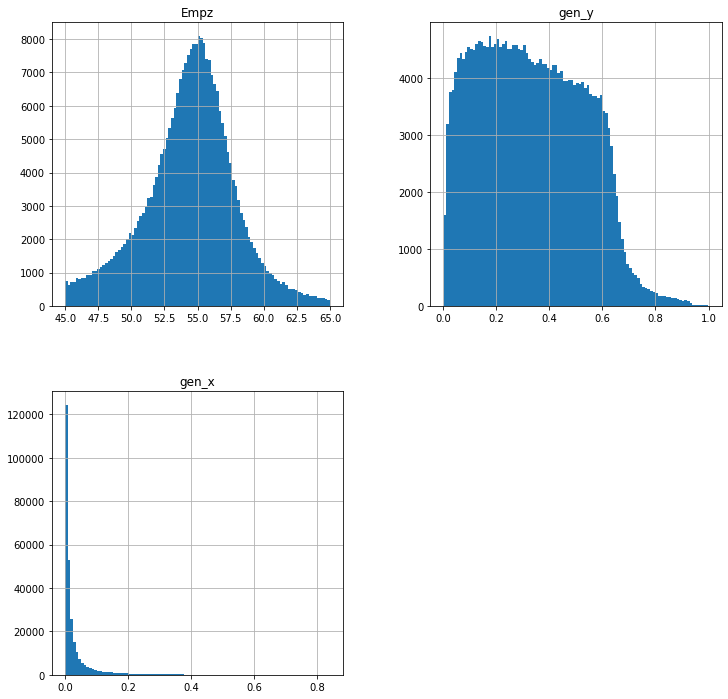

In [5]:
pandas_df.hist(figsize=(12,12), bins=100, column=['Empz','gen_y','gen_x'])
plt.show()

In [6]:
pandas_df

,wgt,y_e,Q2_e,y_sigma,Q2_sigma,y_esigma,Q2_esigma,y_da,Q2_da,y_h,...,gene_pt,gene_phi,HFS_phi,HFS_pt,dphi,gen_dphi,HFS_Empz,e_Empz,gene_Empz,s
entry,,,,,,,,,,,,,,,,,,,,,
9,0.008617,0.084392,1877.214722,0.087820,1884.270386,0.087491,1877.214722,0.086757,1872.364868,0.088150,...,42.024578,1.379465,-1.771349,42.015118,3.150502,3.141593,4.865891,50.541573,51.081085,101568.0
13,0.008617,0.597157,885.630615,0.621432,942.419250,0.583985,885.630615,0.630583,812.146057,0.661279,...,18.043825,0.401690,-2.323327,18.164295,2.724788,3.141593,36.502609,22.236927,21.011444,101568.0
20,0.008617,0.171546,1309.299072,0.068047,1163.892822,0.076548,1309.299072,0.136541,1364.621338,0.060490,...,33.622746,2.096463,-1.322390,15.206989,3.418535,3.141593,3.339027,45.730652,47.131447,101568.0
21,0.071911,0.196490,279.604614,0.092119,247.460953,0.104085,279.604614,0.084321,318.636963,0.081529,...,14.780707,-1.171766,1.955483,16.515541,3.156560,3.141593,4.500389,44.353752,43.702736,101568.0
22,0.008617,0.692239,14469.998047,0.668255,13423.892578,0.720331,14469.998047,0.666726,15669.503906,0.619944,...,70.459167,-2.140570,0.999157,67.194351,3.149307,3.141593,34.220890,16.988434,18.121147,101568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999974,0.010095,0.626395,149.484268,0.620632,147.213715,0.630205,149.484268,0.676363,129.491516,0.611206,...,7.567317,0.690020,-2.246008,5.850025,2.934098,3.141593,33.738552,20.623009,20.615164,101568.0
999979,0.008719,0.480189,210.229385,0.477959,209.331406,0.480009,210.229385,0.529320,190.358963,0.475918,...,10.219979,2.697688,-0.530031,8.510646,3.228683,3.141593,26.270649,28.693569,28.449524,101568.0
999983,0.053444,0.036020,262.221222,0.067305,271.016754,0.065120,262.221222,0.093811,246.500793,0.069562,...,15.016126,0.554531,-2.592213,11.082466,3.145389,3.141593,3.839834,53.211708,50.053474,101568.0


## Set up machine learning stuff

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os

#os.environ['CUDA_VISIBLE_DEVICES']="0"

print(tf.config.list_physical_devices())

#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices = tf.config.list_physical_devices('CPU') 



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Test with gen electron vars only

Should be a slam dunk.

In [8]:
X = np.c_[ 
          pandas_df['gene_pz'].to_numpy(),
          pandas_df['gene_e'].to_numpy(),
          pandas_df['gene_pt'].to_numpy(),
          pandas_df['gene_Empz'].to_numpy(),
         ]

Y = pandas_df['gen_x'].to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = Y.reshape(-1,1)
scalerY = StandardScaler()
scalerY.fit(Y)
Y = scalerY.transform(Y)

GY = pandas_df['gen_y'].to_numpy()

print('\n\n Shape of X')
print( X.shape )

print('\n\n Shape of Y')
print( Y.shape )



 Shape of X
(279627, 4)


 Shape of Y
(279627, 1)


In [9]:
X_train, X_test, Y_train, Y_test, GY_train, GY_test = train_test_split( X, Y, GY, test_size=0.5)

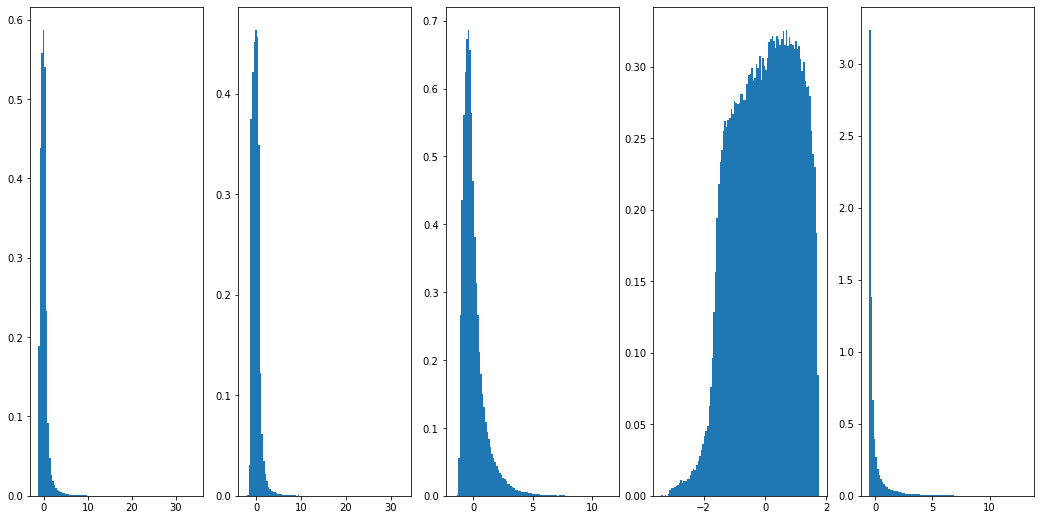

In [10]:
fig,ax = plt.subplots(1,5,figsize=(18,9))
for i in range(4):
    ax[i].hist( X[:,i],density=True,bins=100)

ax[4].hist( Y[:,0],density=True,bins=100)
plt.show()

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='selu'))
model.add(Dense(1, activation='linear'))

#opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
myloss = tf.keras.losses.Huber()

model.compile(loss=myloss, optimizer=opt, metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, Y_train, epochs=30, batch_size=500, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/30
280/280 [==============================] - 1s 3ms/step - loss: 0.1540 - accuracy: 0.0000e+00 - val_loss: 0.0980 - val_accuracy: 0.0000e+00
Epoch 2/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1112 - accuracy: 0.0000e+00 - val_loss: 0.0876 - val_accuracy: 0.0000e+00
Epoch 3/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.0000e+00 - val_loss: 0.0814 - val_accuracy: 0.0000e+00
Epoch 4/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.0000e+00 - val_loss: 0.0749 - val_accuracy: 0.0000e+00
Epoch 5/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.0000e+00 - val_loss: 0.0697 - val_accuracy: 0.0000e+00
Epoch 6/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.0000e+00 - val_loss: 0.0659 - val_accuracy: 0.0000e+00
Epoch 7/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.0000e

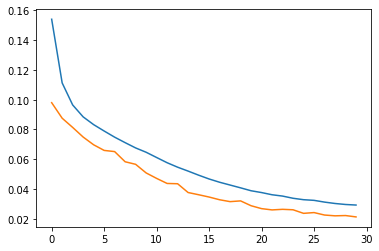

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [14]:
mypreds = model.predict(X_test,batch_size=1000)

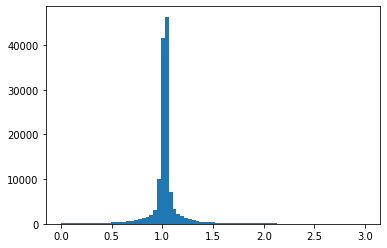

In [15]:
_,_,_=plt.hist(mypreds[:,0]/Y_test[:,0],bins=np.linspace(0,3,80))

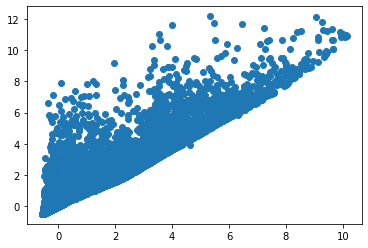

In [16]:
plt.scatter(mypreds[:,0],Y_test[:,0])

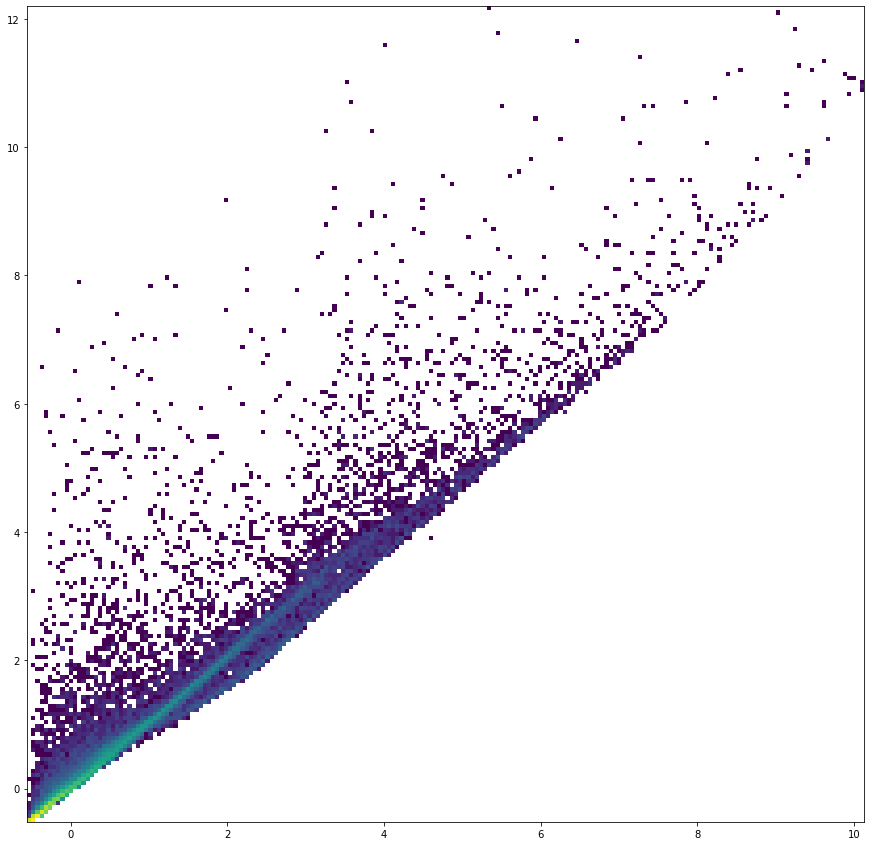

In [17]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.hist2d(mypreds[:,0],Y_test[:,0],bins=200, norm=mpl.colors.LogNorm())
plt.show()

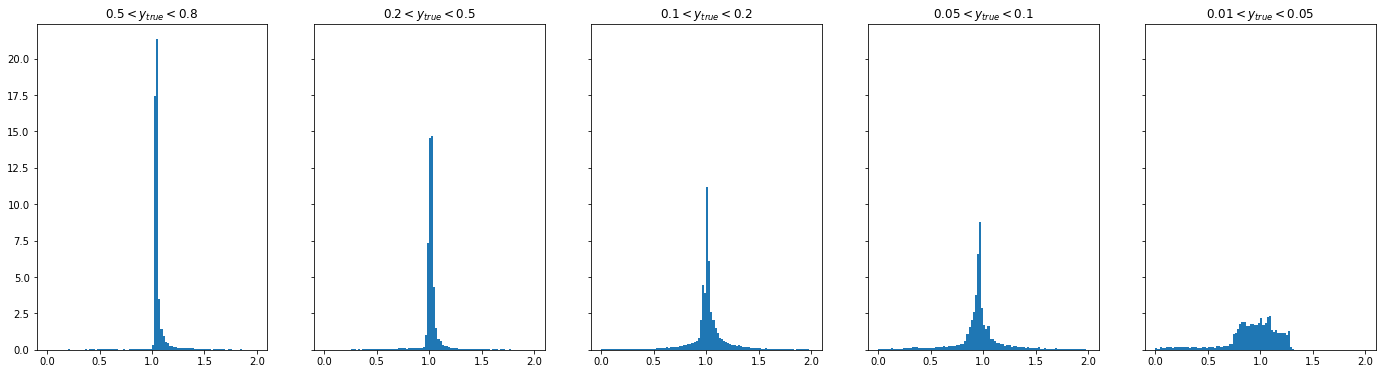

In [18]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(mypreds[:,0][(GY_test > 0.5)*(GY_test < 0.8)]/Y_test[(GY_test > 0.5)*(GY_test < 0.8)][:,0],density=True,bins=100,range=(0,2))
ax[1].hist(mypreds[:,0][(GY_test > 0.2)*(GY_test < 0.5)]/Y_test[(GY_test > 0.2)*(GY_test < 0.5)][:,0],density=True,bins=100,range=(0,2))
ax[2].hist(mypreds[:,0][(GY_test > 0.1)*(GY_test < 0.2)]/Y_test[(GY_test > 0.1)*(GY_test < 0.2)][:,0],density=True,bins=100,range=(0,2))
ax[3].hist(mypreds[:,0][(GY_test > 0.05)*(GY_test < 0.1)]/Y_test[(GY_test > 0.05)*(GY_test < 0.1)][:,0],density=True,bins=100,range=(0,2))
ax[4].hist(mypreds[:,0][(GY_test > 0.01)*(GY_test < 0.05)]/Y_test[(GY_test > 0.01)*(GY_test < 0.05)][:,0],density=True,bins=100,range=(0,2))

ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

plt.show()



## Conclusions on gen e vars only

Works, but sensitive to size of training sample and learning rate.  Can get artifacts if those are not right.

## Test with reco e vars only

This should be similar to the simple e method results.

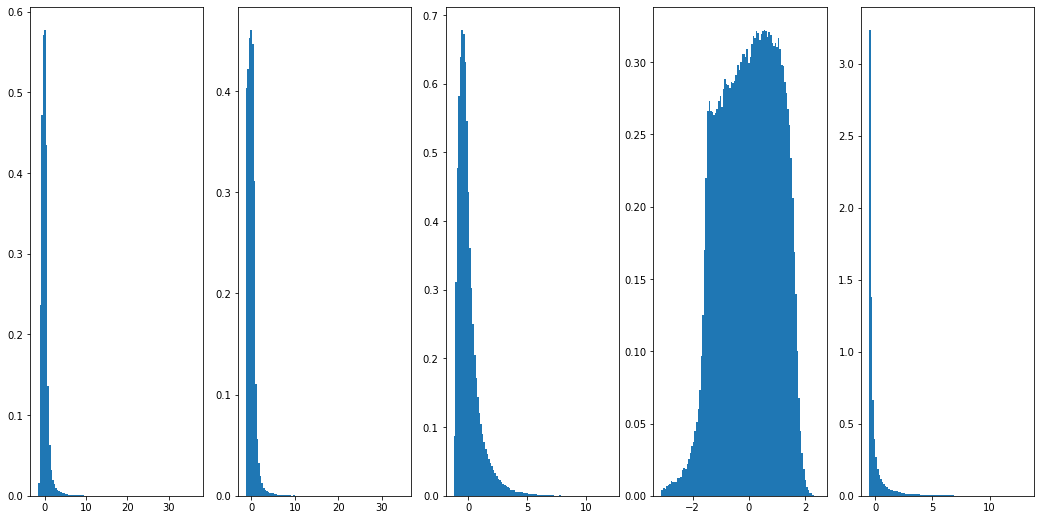

In [19]:
X = np.c_[ 
          pandas_df['e_pz'].to_numpy(),
          pandas_df['e_e'].to_numpy(),
          pandas_df['e_pt'].to_numpy(),
          pandas_df['e_Empz'].to_numpy(),
         ]

Y = pandas_df['gen_x'].to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = Y.reshape(-1,1)
scalerY = StandardScaler()
scalerY.fit(Y)
Y = scalerY.transform(Y)

GY = pandas_df['gen_y'].to_numpy()

X_train, X_test, Y_train, Y_test, GY_train, GY_test = train_test_split( X, Y, GY, test_size=0.5)

fig,ax = plt.subplots(1,5,figsize=(18,9))
for i in range(4):
    ax[i].hist( X[:,i],density=True,bins=100)

ax[4].hist( Y[:,0],density=True,bins=100)
plt.show()

In [20]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='selu'))
model.add(Dense(1, activation='linear'))

#opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
myloss = tf.keras.losses.Huber()

model.compile(loss=myloss, optimizer=opt, metrics=['accuracy'])

In [21]:
hist = model.fit(X_train, Y_train, epochs=30, batch_size=500, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/30
280/280 [==============================] - 1s 3ms/step - loss: 0.1456 - accuracy: 0.0000e+00 - val_loss: 0.1013 - val_accuracy: 0.0000e+00
Epoch 2/30
280/280 [==============================] - 1s 3ms/step - loss: 0.1122 - accuracy: 0.0000e+00 - val_loss: 0.0923 - val_accuracy: 0.0000e+00
Epoch 3/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.0000e+00 - val_loss: 0.0860 - val_accuracy: 0.0000e+00
Epoch 4/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.0000e+00 - val_loss: 0.0829 - val_accuracy: 0.0000e+00
Epoch 5/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.0000e+00 - val_loss: 0.0827 - val_accuracy: 0.0000e+00
Epoch 6/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.0000e+00 - val_loss: 0.0823 - val_accuracy: 0.0000e+00
Epoch 7/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.0000e

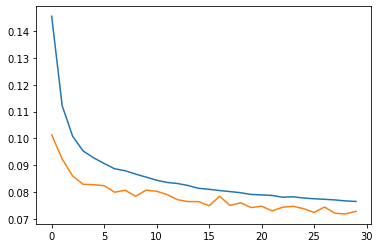

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [23]:
mypreds = model.predict(X_test,batch_size=1000)

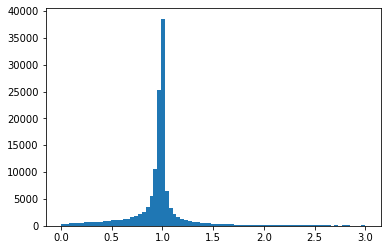

In [24]:
_,_,_=plt.hist(mypreds[:,0]/Y_test[:,0],bins=np.linspace(0,3,80))

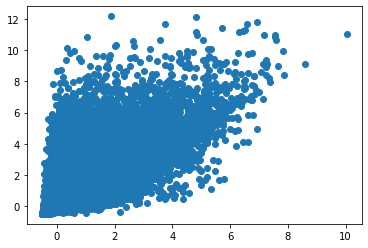

In [25]:
plt.scatter(mypreds[:,0],Y_test[:,0])

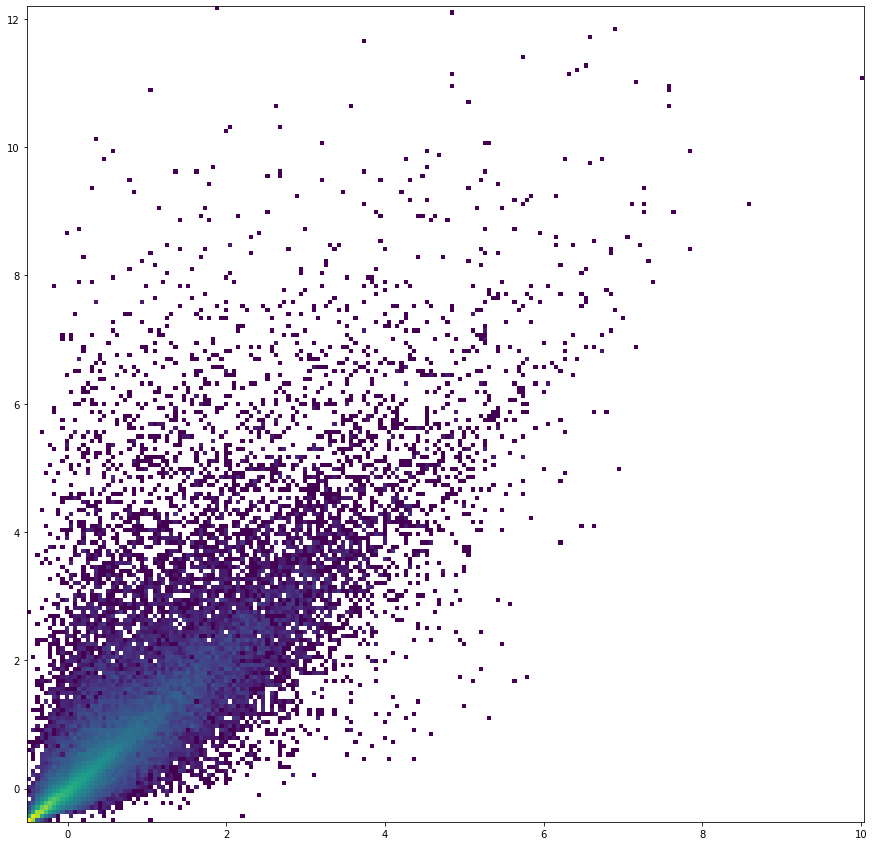

In [26]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.hist2d(mypreds[:,0],Y_test[:,0],bins=200, norm=mpl.colors.LogNorm())
plt.show()

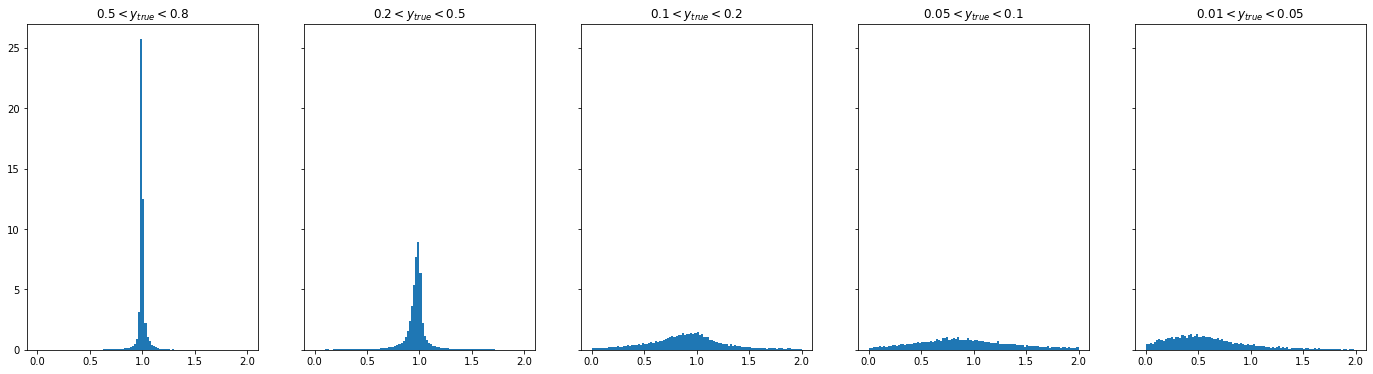

In [27]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(mypreds[:,0][(GY_test > 0.5)*(GY_test < 0.8)]/Y_test[(GY_test > 0.5)*(GY_test < 0.8)][:,0],density=True,bins=100,range=(0,2))
ax[1].hist(mypreds[:,0][(GY_test > 0.2)*(GY_test < 0.5)]/Y_test[(GY_test > 0.2)*(GY_test < 0.5)][:,0],density=True,bins=100,range=(0,2))
ax[2].hist(mypreds[:,0][(GY_test > 0.1)*(GY_test < 0.2)]/Y_test[(GY_test > 0.1)*(GY_test < 0.2)][:,0],density=True,bins=100,range=(0,2))
ax[3].hist(mypreds[:,0][(GY_test > 0.05)*(GY_test < 0.1)]/Y_test[(GY_test > 0.05)*(GY_test < 0.1)][:,0],density=True,bins=100,range=(0,2))
ax[4].hist(mypreds[:,0][(GY_test > 0.01)*(GY_test < 0.05)]/Y_test[(GY_test > 0.01)*(GY_test < 0.05)][:,0],density=True,bins=100,range=(0,2))

ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

plt.show()




## Conclusions on reco electron vars only

More or less looks as expected.  Resolution gets very poor at low y.

## Now feed in reco electron and reco HFS

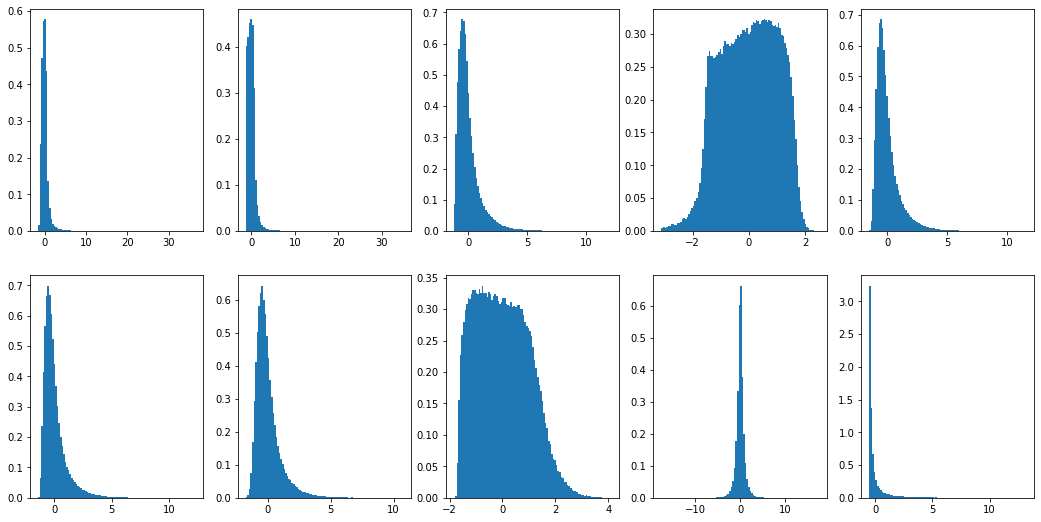

In [28]:
X = np.c_[ 
          pandas_df['e_pz'].to_numpy(),
          pandas_df['e_e'].to_numpy(),
          pandas_df['e_pt'].to_numpy(),
          pandas_df['e_Empz'].to_numpy(),
          pandas_df['HFS_pz'].to_numpy(),
          pandas_df['HFS_E'].to_numpy(),
          pandas_df['HFS_pt'].to_numpy(),
          pandas_df['HFS_Empz'].to_numpy(),
          pandas_df['dphi'].to_numpy(),
         ]

Y = pandas_df['gen_x'].to_numpy()

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = Y.reshape(-1,1)
scalerY = StandardScaler()
scalerY.fit(Y)
Y = scalerY.transform(Y)

GY = pandas_df['gen_y'].to_numpy()

X_train, X_test, Y_train, Y_test, GY_train, GY_test = train_test_split( X, Y, GY, test_size=0.5)

fig,ax = plt.subplots(2,5,figsize=(18,9))
for i in range(5):
    ax[0][i].hist( X[:,i],density=True,bins=100)
for i in range(4):
    ax[1][i].hist( X[:,i+5],density=True,bins=100)

ax[1][4].hist( Y[:,0],density=True,bins=100)
plt.show()

In [29]:
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='selu'))
model.add(Dense(1, activation='linear'))

#opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
myloss = tf.keras.losses.Huber()

model.compile(loss=myloss, optimizer=opt, metrics=['accuracy'])

In [30]:
hist = model.fit(X_train, Y_train, epochs=30, batch_size=500, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/30
280/280 [==============================] - 1s 3ms/step - loss: 0.1687 - accuracy: 0.0000e+00 - val_loss: 0.0872 - val_accuracy: 0.0000e+00
Epoch 2/30
280/280 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.0000e+00 - val_loss: 0.0787 - val_accuracy: 0.0000e+00
Epoch 3/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.0000e+00 - val_loss: 0.0715 - val_accuracy: 0.0000e+00
Epoch 4/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.0000e+00 - val_loss: 0.0662 - val_accuracy: 0.0000e+00
Epoch 5/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.0000e+00 - val_loss: 0.0616 - val_accuracy: 0.0000e+00
Epoch 6/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.0000e+00 - val_loss: 0.0593 - val_accuracy: 0.0000e+00
Epoch 7/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.0000e

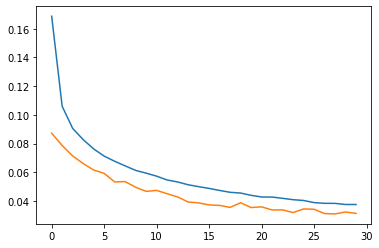

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [32]:
mypreds = model.predict(X_test,batch_size=1000)

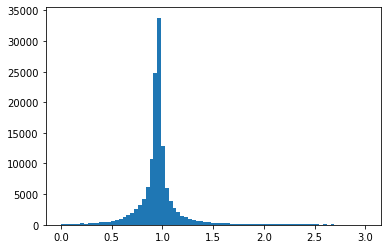

In [33]:
_,_,_=plt.hist(mypreds[:,0]/Y_test[:,0],bins=np.linspace(0,3,80))

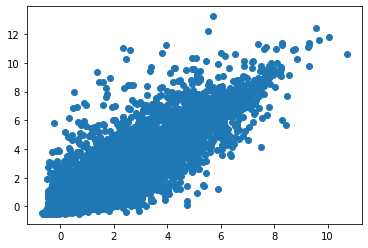

In [34]:
plt.scatter(mypreds[:,0],Y_test[:,0])

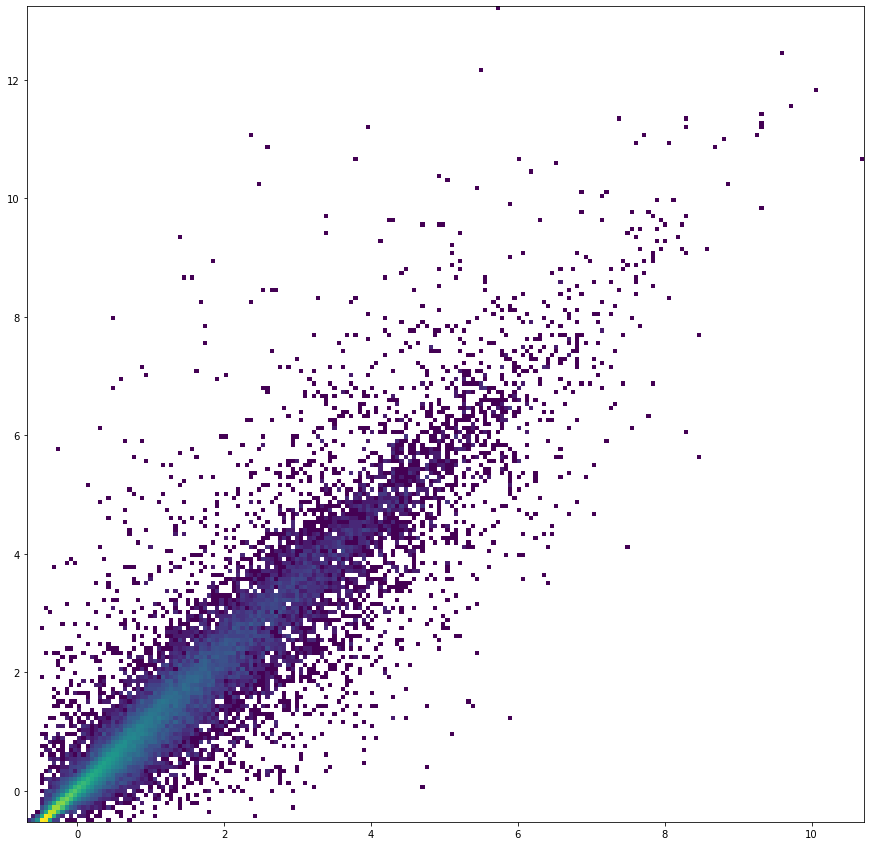

In [35]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.hist2d(mypreds[:,0],Y_test[:,0],bins=200, norm=mpl.colors.LogNorm())
plt.show()

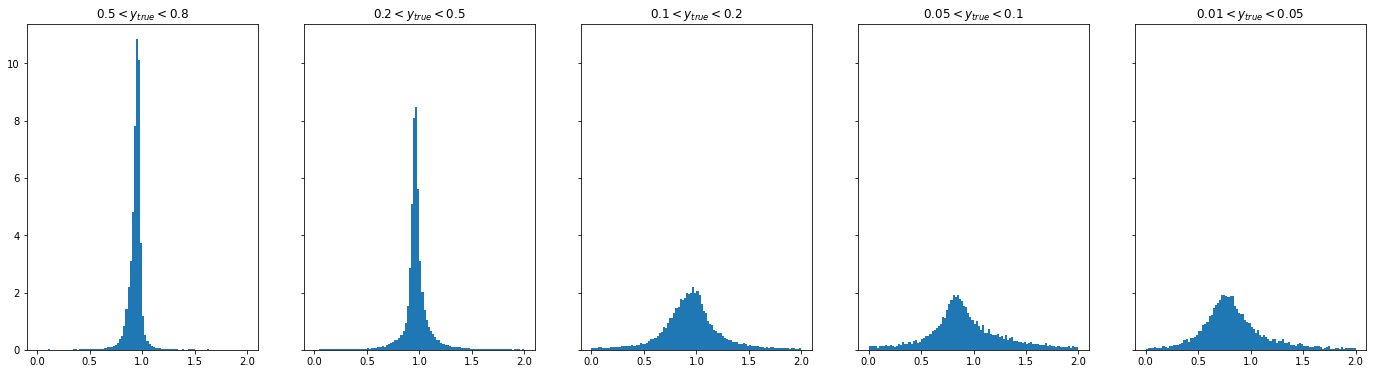

In [36]:
fig,ax = plt.subplots(1,5,figsize=(24,6),sharey='row')

ax[0].hist(mypreds[:,0][(GY_test > 0.5)*(GY_test < 0.8)]/Y_test[(GY_test > 0.5)*(GY_test < 0.8)][:,0],density=True,bins=100,range=(0,2))
ax[1].hist(mypreds[:,0][(GY_test > 0.2)*(GY_test < 0.5)]/Y_test[(GY_test > 0.2)*(GY_test < 0.5)][:,0],density=True,bins=100,range=(0,2))
ax[2].hist(mypreds[:,0][(GY_test > 0.1)*(GY_test < 0.2)]/Y_test[(GY_test > 0.1)*(GY_test < 0.2)][:,0],density=True,bins=100,range=(0,2))
ax[3].hist(mypreds[:,0][(GY_test > 0.05)*(GY_test < 0.1)]/Y_test[(GY_test > 0.05)*(GY_test < 0.1)][:,0],density=True,bins=100,range=(0,2))
ax[4].hist(mypreds[:,0][(GY_test > 0.01)*(GY_test < 0.05)]/Y_test[(GY_test > 0.01)*(GY_test < 0.05)][:,0],density=True,bins=100,range=(0,2))

ax[0].set_title('$0.5<y_{true}<0.8$')
ax[1].set_title('$0.2<y_{true}<0.5$')
ax[2].set_title('$0.1<y_{true}<0.2$')
ax[3].set_title('$0.05<y_{true}<0.1$')
ax[4].set_title('$0.01<y_{true}<0.05$')

plt.show()

